In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mapper = [
    "leaf green",
    "light green",
    "cyan",
    "orange",
    "magenta",
    "light blue",
    "black",
    "red", 
    "yellow", 
    "blue",
    "brown",
    "coral",
    "darkblue",
    "darkblue",
    "green",
    "lavender",
    "pink",
    "orange",
    "purple",
    "salmon",
    "turquoise",
    "white"
]

type_color_mapping = {
    'leaf green': 'green',
    'light green': 'lightgreen',
    'cyan': 'cyan',
    'orange': 'orange',
    'magenta': 'magenta',
    'light blue': 'lightblue',
    'black': 'black',
    'red': 'red',
    'yellow': 'yellow',
    'blue': 'blue',
    'brown': 'brown',
    'coral': 'coral',
    'darkblue': 'darkblue',
    'green': 'green',
    'lavender': 'lavender',
    'pink': 'pink',
    'orange': 'orange',
    'purple': 'purple',
    'salmon': 'salmon',
    'turquoise': 'turquoise',
    'white': 'white'
}


In [6]:

cars_per_min = pd.read_csv('RawData2/carspermin.csv')
first_time_value = cars_per_min['time'].iloc[0]
cars_per_min['time'] = cars_per_min['time'] - first_time_value

cars_per_min.to_csv('processed/carspermin.csv', index=False)


In [7]:

time_data = pd.read_csv('RawData2/takenTimeData.csv')
first_time_value = time_data['time'].iloc[0]
time_data['time'] = time_data['time'] - first_time_value
time_data['type'] = time_data['type'].map(lambda x: mapper[x])

time_data.to_csv('processed/TimeData.csv', index=False)


In [8]:

time_data = pd.read_csv('RawData2/carsData.csv')
time_data['type'] = time_data['type'].map(lambda x: mapper[x])

time_data.to_csv('processed/carsData.csv', index=False)


In [9]:
time_data = pd.read_csv('processed/TimeData.csv')
cars_data = pd.read_csv('processed/carsData.csv')
cars_per_min = pd.read_csv('processed/carspermin.csv')

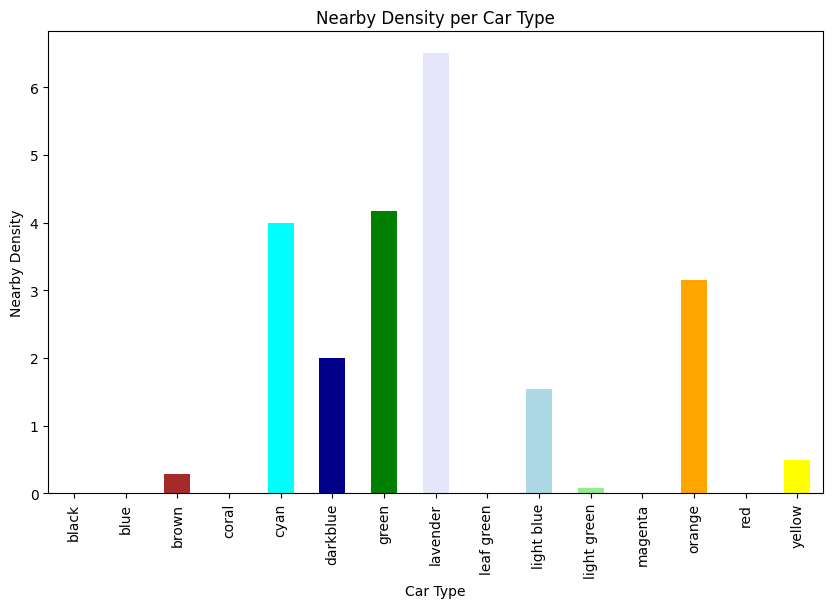

In [10]:

# Group by type and calculate nearby density
density_per_type = time_data.groupby('type')['nearbyDensity'].mean()

# Bar plot for nearby density per type
plt.figure(figsize=(10, 6))
density_per_type.plot(kind='bar', color=density_per_type.index.map(type_color_mapping))

# Add labels and title
plt.xlabel('Car Type')
plt.ylabel('Nearby Density')
plt.title('Nearby Density per Car Type')

# Display the plot
plt.show()


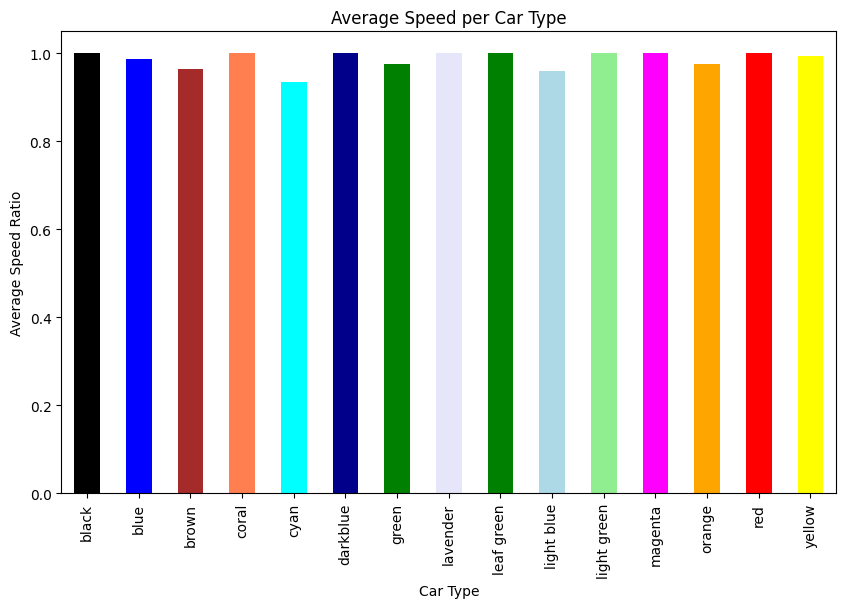

In [11]:
avg_speed_per_type = time_data.groupby('type')['avgspeedRatio'].mean()

plt.figure(figsize=(10, 6))
avg_speed_per_type.plot(kind='bar', color=avg_speed_per_type.index.map(type_color_mapping))

# Add labels and title
plt.xlabel('Car Type')
plt.ylabel('Average Speed Ratio')
plt.title('Average Speed per Car Type')

# Display the plot
plt.show()

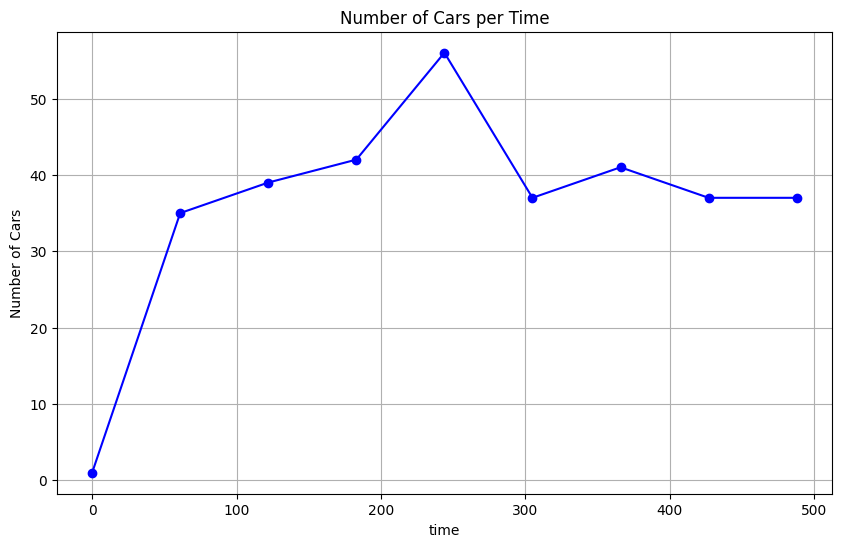

In [12]:

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(cars_per_min['time'], cars_per_min['Car'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('time')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Time')

# Display the plot
plt.grid(True)
plt.show()


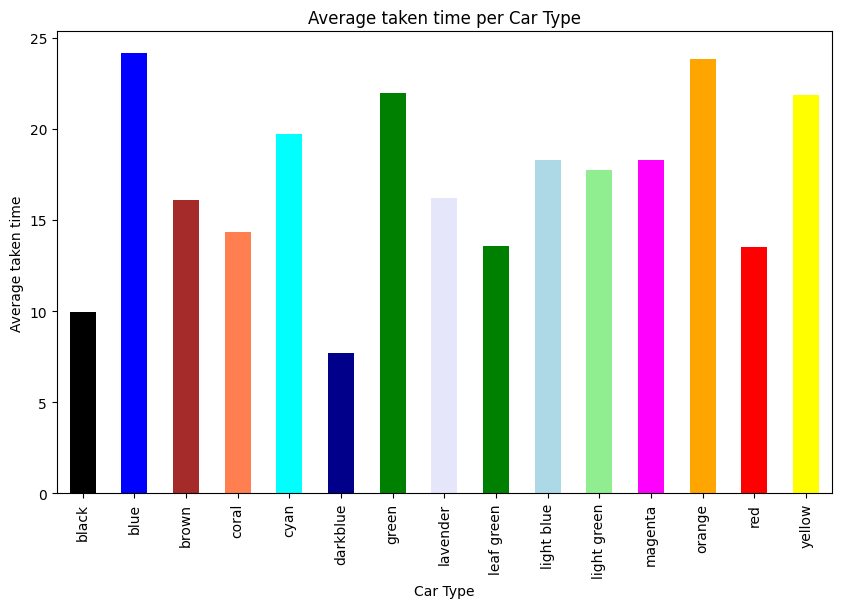

In [13]:
takentime_per_type = cars_data.groupby('type')['takentime'].mean()
plt.figure(figsize=(10, 6))
takentime_per_type.plot(kind='bar', color=takentime_per_type.index.map(type_color_mapping))

plt.xlabel('Car Type')
plt.ylabel('Average taken time')
plt.title('Average taken time per Car Type')

plt.show()


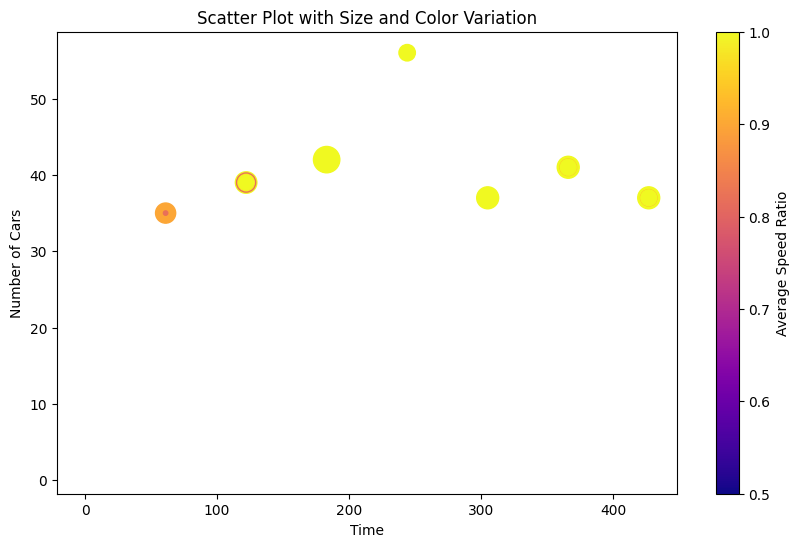

In [14]:
merged_data = pd.merge(cars_per_min, time_data, how='inner', on='time')

# Scatter plot with size and color variation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_data['time'], merged_data['Car'], c=merged_data['avgspeedRatio'], s=merged_data['nearbyDensity']*10, cmap='plasma')
plt.colorbar(scatter, label='Average Speed Ratio')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of Cars')
plt.title('Scatter Plot with Size and Color Variation')

plt.show()